A team of plantation planners are concerned about the yield of oil palm trees, which seems to fluctuate. They have collected a set of data and needed help in analysing on how external factors influence fresh fruit bunch (FFB) yield. Some experts are of opinion that the flowering of oil palm tree determines the FFB yield, and are linked to the external factors. Perform the analysis, which requires some study on the background of oil palm tree physiology.

## Loading Basic Libraries and dataset 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
%matplotlib inline

In [2]:
df = pd.read_csv('palm_ffb.csv',parse_dates=['Date'], index_col='Date') 

## parsing date columns into date format and setting it as index

## Exploratory Data Analysis

In [3]:
df.head()

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
Date,,,,,,,,
2008-01-01,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
2008-01-02,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2008-01-03,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
2008-01-04,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
2008-01-05,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44


In [4]:
df.shape ## this specifies there are 130 observations and 8 features

(130, 8)

In [5]:
df.isna().sum() ## checking missing values

# this dataset contains no missing values

SoilMoisture     0
Average_Temp     0
Min_Temp         0
Max_Temp         0
Precipitation    0
Working_days     0
HA_Harvested     0
FFB_Yield        0
dtype: int64

In [6]:
df.columns

Index(['SoilMoisture', 'Average_Temp', 'Min_Temp', 'Max_Temp', 'Precipitation',
       'Working_days', 'HA_Harvested', 'FFB_Yield'],
      dtype='object')

In [7]:
df.info()  ## Determining Datatype of Each feature

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 130 entries, 2008-01-01 to 2018-01-10
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SoilMoisture   130 non-null    float64
 1   Average_Temp   130 non-null    float64
 2   Min_Temp       130 non-null    float64
 3   Max_Temp       130 non-null    float64
 4   Precipitation  130 non-null    float64
 5   Working_days   130 non-null    int64  
 6   HA_Harvested   130 non-null    float64
 7   FFB_Yield      130 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 9.1 KB


In [8]:
df.describe()  ## Summary of Data

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,527.646923,26.849918,21.379231,33.851538,188.980769,24.753846,793404.491565,1.602231
std,57.367844,0.651413,0.688971,1.079638,80.237210,1.239289,34440.893854,0.281751
min,380.700000,25.158065,18.900000,31.100000,2.000000,21.000000,683431.944400,1.080000
25%,488.625000,26.442285,21.000000,33.100000,140.300000,24.000000,768966.949100,1.390000
50%,538.300000,26.930645,21.500000,33.900000,182.150000,25.000000,790036.158050,1.585000
75%,571.025000,27.270726,21.800000,34.600000,226.100000,26.000000,821989.235250,1.807500
max,647.300000,28.580000,22.600000,36.000000,496.100000,27.000000,882254.225400,2.270000


In [9]:
df.index ## checking the index of dataframe for further data understanding

DatetimeIndex(['2008-01-01', '2008-01-02', '2008-01-03', '2008-01-04',
               '2008-01-05', '2008-01-06', '2008-01-07', '2008-01-08',
               '2008-01-09', '2008-01-10',
               ...
               '2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10'],
              dtype='datetime64[ns]', name='Date', length=130, freq=None)

In [10]:
df.head(10)

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
Date,,,,,,,,
2008-01-01,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
2008-01-02,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2008-01-03,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
2008-01-04,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
2008-01-05,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44
2008-01-06,532.5,27.116667,21.4,35.5,182.3,24,829817.5676,1.48
2008-01-07,544.7,27.035484,21.2,33.9,201.6,26,814475.3012,1.66
2008-01-08,569.9,27.200000,21.7,34.5,283.2,26,782279.5322,1.71
2008-01-09,571.7,27.556667,21.2,35.1,176.3,25,795237.6543,1.62


## Analyzing Each feature individually

### <i> Analyzing "Working Days" feature</i>

In [11]:
# Analysizing working days
df['Working_days'].value_counts() 

## Observations : 
    #there are 39 observations that took 25 working days, 35 obseravtions took 26 working days

25    39
26    35
24    33
23    13
27     5
21     3
22     2
Name: Working_days, dtype: int64

In [12]:
## Understanding the impact of working days on FFB yeild.
df.groupby('Working_days')['FFB_Yield'].mean().sort_values(ascending=False)

## Observation : 

    # here we see that yeild were working days were 26 > yeild were working days were 27, 
    # other than this decrease in working days, decrease in yield of FFB

Working_days
26    1.651429
25    1.621282
24    1.602424
23    1.544615
21    1.480000
27    1.462000
22    1.275000
Name: FFB_Yield, dtype: float64

<BarContainer object of 130 artists>

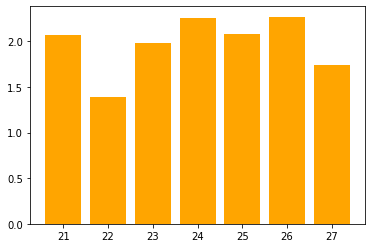

In [13]:
   
pl.bar(df['Working_days'],df['FFB_Yield'],color="orange")


Observations :
    1. Increase or decrease in number of working days shows non-linear relationship with FFB yeild

### <i> Analyzing date that is index of dataframe and FFB yield feature</i>

In [14]:
df_month = df.index.day  ## here Month is refred as day in date column
df_month

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
             1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
           dtype='int64', name='Date', length=130)

In [15]:
df.index.year.value_counts() 

# here we see that we have 10 months data of year 2018

2008    12
2009    12
2010    12
2011    12
2012    12
2013    12
2014    12
2015    12
2016    12
2017    12
2018    10
Name: Date, dtype: int64

In [16]:
## individually analysing yeild production year wise

df2 = df[df.index.year == 2008]
df3 = df[df.index.year == 2009]
df4 = df[df.index.year == 2010]
df5 = df[df.index.year == 2011]
df6 = df[df.index.year == 2012]
df7 = df[df.index.year == 2013]
df8 = df[df.index.year == 2014]
df9 = df[df.index.year == 2015]
df10 = df[df.index.year == 2016]
df11 = df[df.index.year == 2017]
df12 = df[df.index.year == 2018]


In [18]:

def addlabels(x,y):
    for i in range(len(x)):
        pl.text(i,y[i],y[i])

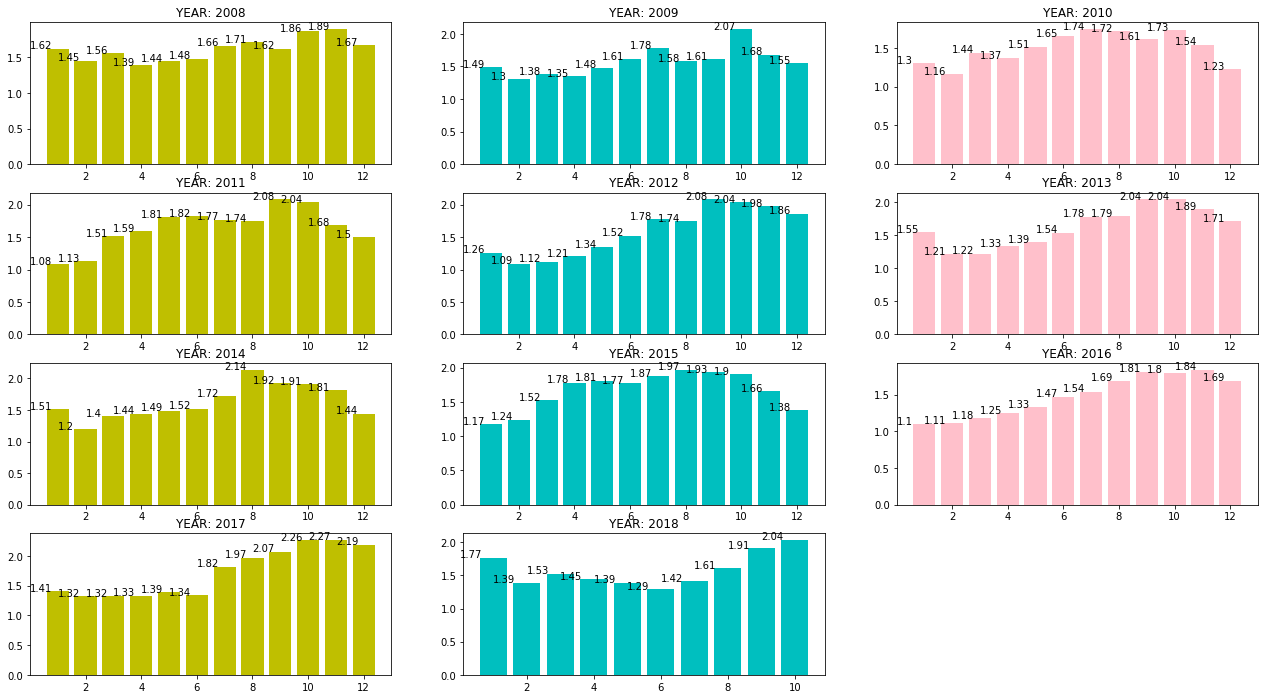

In [19]:
## plotting FFB yeild with respect to year, monthly data

fig = pl.figure(figsize=(22,12))

pl.subplot(4,3,1)
pl.title('YEAR: 2008')
pl.bar(df2.index.day,df2['FFB_Yield'],color ='y')
addlabels(df2.index.day,df2['FFB_Yield'])
    
pl.subplot(4,3,2)
pl.title('YEAR: 2009')
pl.bar(df3.index.day,df3['FFB_Yield'],color ='c')
addlabels(df3.index.day,df3['FFB_Yield'])

pl.subplot(4,3,3)
pl.title('YEAR: 2010')
pl.bar(df4.index.day,df4['FFB_Yield'],color ='pink')
addlabels(df4.index.day,df4['FFB_Yield'])

pl.subplot(4,3,4)
pl.title('YEAR: 2011')
pl.bar(df5.index.day,df5['FFB_Yield'],color ='y')
addlabels(df5.index.day,df5['FFB_Yield'])

pl.subplot(4,3,5)
pl.title('YEAR: 2012')
pl.bar(df6.index.day,df6['FFB_Yield'],color ='c')
addlabels(df6.index.day,df6['FFB_Yield'])

pl.subplot(4,3,6)
pl.title('YEAR: 2013')
pl.bar(df7.index.day,df7['FFB_Yield'],color ='pink')
addlabels(df7.index.day,df7['FFB_Yield'])

pl.subplot(4,3,7)
pl.title('YEAR: 2014')
pl.bar(df8.index.day,df8['FFB_Yield'],color ='y')
addlabels(df8.index.day,df8['FFB_Yield'])

pl.subplot(4,3,8)
pl.title('YEAR: 2015')
pl.bar(df9.index.day,df9['FFB_Yield'],color ='c')
addlabels(df9.index.day,df9['FFB_Yield'])

pl.subplot(4,3,9)
pl.title('YEAR: 2016')
pl.bar(df10.index.day,df10['FFB_Yield'],color ='pink')
addlabels(df10.index.day,df10['FFB_Yield'])

pl.subplot(4,3,10)
pl.title('YEAR: 2017')
pl.bar(df11.index.day,df11['FFB_Yield'],color ='y')
addlabels(df11.index.day,df11['FFB_Yield'])

pl.subplot(4,3,11)
pl.title('YEAR: 2018')
pl.bar(df12.index.day,df12['FFB_Yield'],color ='c')
addlabels(df12.index.day,df12['FFB_Yield'])


## Observations from above graph :
1. Above graph shows distribution of yeild of FFB year wise in a monthly plot
2. In year 2016, least number of FFB were produced in month of January were as 2017 has highest number of FFB yeild in month of november
3. As we can see from above graphs that the production of FFB is non - linear
4. We can observe that most of the FFB were produced between  the month of August - December and highest production can be observed in month september and November.

### Now we will study other attributes based on obervations made from above graph

In [20]:
## Finding maximum yeild production year wise
df.groupby(df.index.year)['FFB_Yield'].max().sort_values(ascending=False)  

## Observation: 2017 and 2014 showed the maximum yeild

Date
2017    2.27
2014    2.14
2011    2.08
2012    2.08
2009    2.07
2013    2.04
2018    2.04
2015    1.97
2008    1.89
2016    1.84
2010    1.74
Name: FFB_Yield, dtype: float64

In [21]:
## Finding maximum yeild month wise
df.groupby(df.index.day)['FFB_Yield'].max().sort_values(ascending=False)

## August to December shows maximum yeild of FFB

Date
11    2.27
10    2.26
12    2.19
8     2.14
9     2.08
7     1.87
6     1.82
5     1.81
4     1.78
1     1.77
3     1.56
2     1.45
Name: FFB_Yield, dtype: float64

In [22]:
max_yeild_df = df[((df.index.year ==2014)|(df.index.year ==2017)) & 
                  ((df.index.day == 8)|(df.index.day == 9)|
                   (df.index.day == 10)|(df.index.day == 11)|(df.index.day ==12))]
max_yeild_df

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
Date,,,,,,,,
2014-01-08,542.8,26.212903,21.0,32.3,250.0,26,785828.0374,2.14
2014-01-09,536.9,26.546667,20.3,33.7,119.2,25,773833.3333,1.92
2014-01-10,509.8,27.119355,21.8,34.1,165.2,25,754434.0314,1.91
2014-01-11,555.0,26.443333,21.5,33.4,305.2,23,717359.6685,1.81
2014-01-12,619.4,25.996774,21.3,32.8,374.9,26,683431.9444,1.44
2017-01-08,526.7,26.832258,21.7,32.8,226.5,26,784926.3959,1.97
2017-01-09,539.0,27.066667,21.2,33.8,185.4,21,768186.4734,2.07
2017-01-10,547.5,27.474194,21.2,35.4,219.0,24,765351.3274,2.26
2017-01-11,592.9,26.530000,22.1,33.8,327.3,26,760970.4846,2.27


In [23]:
max_yeild_df.describe()

# From the below summary we can say that for best yeilds, minimum temperature should be between 20.30 to 22.20,
# and maximum temperature should be between 32.30  to 35.40, Precipitation should be between 119.2 to 374.9

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
count,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,558.90000,26.666409,21.430000,33.520000,247.370000,24.600000,755128.973280,1.998000
std,38.23945,0.451241,0.561842,0.867692,79.680097,1.646545,31728.255083,0.250812
min,509.80000,25.996774,20.300000,32.300000,119.200000,21.000000,683431.944400,1.440000
25%,537.42500,26.442285,21.200000,32.875000,193.800000,24.000000,755067.532675,1.912500
50%,545.15000,26.538333,21.400000,33.550000,238.250000,25.000000,763160.906000,2.020000
75%,583.42500,27.008065,21.775000,33.800000,304.150000,26.000000,772421.618325,2.177500
max,619.40000,27.474194,22.200000,35.400000,374.900000,26.000000,785828.037400,2.270000


In [47]:
import seaborn as sns    
import pandas.util.testing as tm
max_yeild_df.corr(method='pearson').style.format("{:.3}").background_gradient(cmap=pl.get_cmap('coolwarm'), axis=1) 

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
SoilMoisture,1.0,-0.596,0.378,-0.253,0.819,0.15,-0.558,-0.139
Average_Temp,-0.596,1.0,0.0316,0.815,-0.604,-0.423,0.444,0.468
Min_Temp,0.378,0.0316,1.0,-0.047,0.523,0.0745,-0.124,0.236
Max_Temp,-0.253,0.815,-0.047,1.0,-0.367,-0.367,0.0967,0.365
Precipitation,0.819,-0.604,0.523,-0.367,1.0,0.251,-0.648,-0.243
Working_days,0.15,-0.423,0.0745,-0.367,0.251,1.0,0.0125,-0.145
HA_Harvested,-0.558,0.444,-0.124,0.0967,-0.648,0.0125,1.0,0.765
FFB_Yield,-0.139,0.468,0.236,0.365,-0.243,-0.145,0.765,1.0


<b> Considering the data of max_yeild_df, we observe that FFB_yield shows a positive correlation with Average Temperature and HA_Harvested and soil moisture has no relation with FFB yield</b>

In [25]:
## Finding minimum yield production year wise
df.groupby(df.index.year)['FFB_Yield'].min().sort_values(ascending=True)  

Date
2011    1.08
2012    1.09
2016    1.10
2010    1.16
2015    1.17
2014    1.20
2013    1.21
2018    1.29
2009    1.30
2017    1.32
2008    1.39
Name: FFB_Yield, dtype: float64

In [26]:
## Finding minimum yeild month wise
df.groupby(df.index.day)['FFB_Yield'].min().sort_values(ascending=True)

## observation : we see that Jan - March are least favorable month for FFB production

Date
1     1.08
2     1.09
3     1.12
4     1.21
12    1.23
6     1.29
5     1.33
7     1.42
11    1.54
8     1.58
9     1.61
10    1.73
Name: FFB_Yield, dtype: float64

In [27]:
df[((df.index.year ==2011)|(df.index.year ==2012)|(df.index.year ==2016)) & 
   ((df.index.day == 1)|(df.index.day == 2)|(df.index.day == 3))]

## Observation : Here we are trying to understand the climate factors. 
## we also observe that in Precipitation there are certain values which doesnt match the 
#standered values, thus indicating outliers

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
Date,,,,,,,,
2011-01-01,647.3,25.170968,21.1,31.5,496.1,24,830578.7037,1.08
2011-01-02,594.9,26.217857,20.3,34.6,22.1,21,808268.1416,1.13
2011-01-03,543.1,26.635484,21.7,33.7,212.4,27,801427.8146,1.51
2012-01-01,602.1,26.112903,21.1,33.5,134.9,24,776784.9206,1.26
2012-01-02,547.2,26.372414,20.8,34.1,129.1,24,829962.3853,1.09
2012-01-03,539.9,26.558065,21.6,33.0,208.9,27,834886.6071,1.12
2016-01-01,553.4,26.767742,22.2,33.2,106.8,26,746198.1818,1.10
2016-01-02,519.1,26.441379,21.9,32.3,175.7,23,766853.1532,1.11
2016-01-03,460.5,27.896774,21.5,35.9,36.5,26,796784.7458,1.18


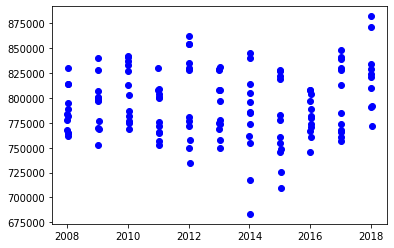

In [28]:
## Analyzing HA_harvested 
pl.plot(df.index.to_numpy(),df['HA_Harvested'].to_numpy(),'bo')

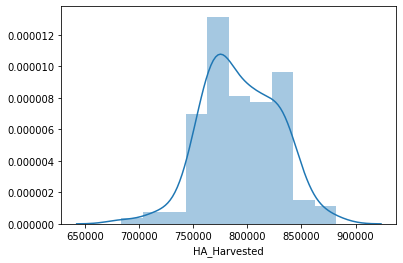

In [29]:
sns.distplot(df['HA_Harvested'])

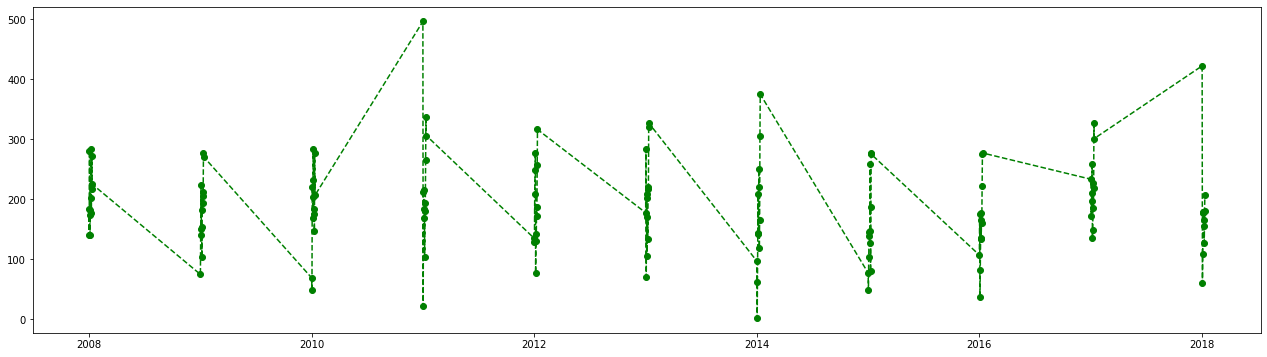

In [30]:
# Analyzing precipitation
fig = pl.figure(figsize=(22,6))

pl.plot(df.index.to_numpy(),df['Precipitation'].to_numpy(),'bo',linestyle ='--',color="green")

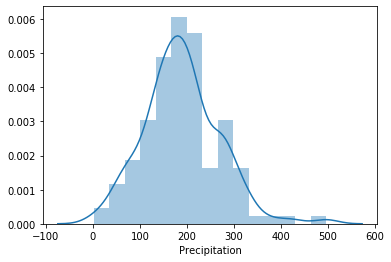

In [31]:
sns.distplot(df['Precipitation'])

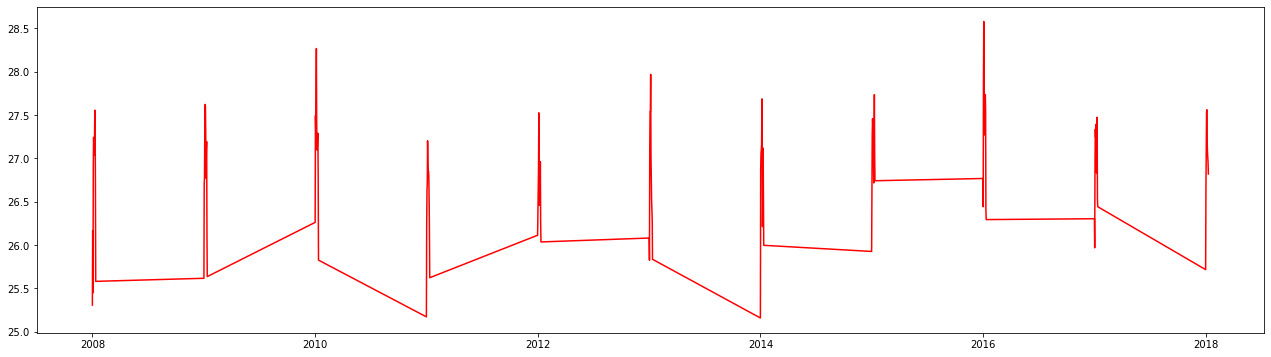

In [32]:
# Analyzing average temperature
fig = pl.figure(figsize=(22,6))

pl.plot(df.index.to_numpy(),df['Average_Temp'].to_numpy(),color="red")

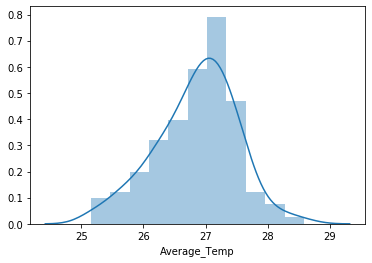

In [33]:
sns.distplot(df['Average_Temp'])

### Trend Analysis

In [34]:
import pymannkendall as mk

mk.original_test(df['FFB_Yield'])


Mann_Kendall_Test(trend='no trend', h=False, p=0.23975628896172108, z=1.1755961644997728, Tau=0.06976744186046512, s=585.0, var_s=246779.66666666666, slope=0.0008695652173913051, intercept=1.5289130434782607)

In [35]:
mk.original_test(df['Average_Temp'])

Mann_Kendall_Test(trend='no trend', h=False, p=0.20917522189493942, z=1.255836591523354, Tau=0.07453786523553965, s=625.0, var_s=246889.66666666666, slope=0.0019148936170212737, intercept=26.80713452670213)

In [36]:
mk.original_test(df['SoilMoisture'])

Mann_Kendall_Test(trend='decreasing', h=True, p=0.0034977481969795665, z=-2.920228501061328, Tau=-0.17316636851520573, s=-1452.0, var_s=246888.66666666666, slope=-0.409345794392524, intercept=564.7028037383177)

In [37]:
mk.original_test(df['Precipitation'])

Mann_Kendall_Test(trend='no trend', h=False, p=0.5993873730350918, z=-0.525281705717246, Tau=-0.031246273106738224, s=-262.0, var_s=246886.0, slope=-0.08, intercept=187.31)

In [38]:
mk.original_test(df['HA_Harvested'])

Mann_Kendall_Test(trend='no trend', h=False, p=0.9166514548963565, z=-0.10465262541028518, Tau=-0.006320810971973762, s=-53.0, var_s=246891.66666666666, slope=-8.38126666666681, intercept=790576.74975)

In [39]:
mk.original_test(df['Max_Temp'])

Mann_Kendall_Test(trend='no trend', h=False, p=0.6388979646686375, z=0.46924018514860144, Tau=0.027906976744186046, s=234.0, var_s=246559.33333333334, slope=0.0010869565217391458, intercept=33.829891304347825)

In [40]:
mk.original_test(df['Min_Temp'])

Mann_Kendall_Test(trend='no trend', h=False, p=0.730205642150759, z=-0.3448519943040081, Tau=-0.020512820512820513, s=-172.0, var_s=245882.0, slope=0.0, intercept=21.5)

<b> From the above trend analysis, we see that only soil moisture, follows a decreasing trend </b>

### OutLier Detection

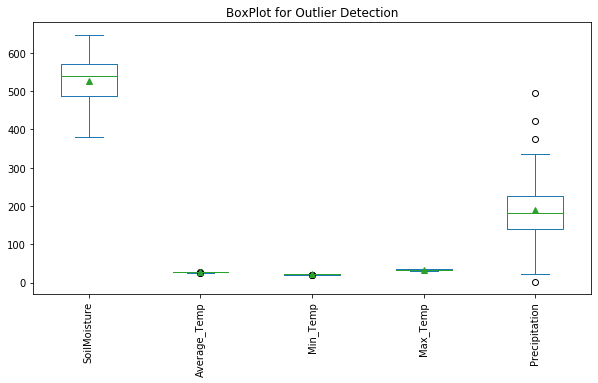

In [41]:
ax = df[['SoilMoisture', 'Average_Temp','Min_Temp','Max_Temp','Precipitation']].plot(kind='box', 
                                                                                     title='BoxPlot for Outlier Detection', 
                                                                                     showmeans=True,figsize = (10,5),rot=90)
pl.show()

## in the figure below we observe that, there are 4 outliers in precipitation

In [42]:
## using quartile method to remove outliers

upper_limit = df['Precipitation'].quantile(0.99)
lower_limit = df['Precipitation'].quantile(0.01)
print("Upper Limit :",upper_limit )
print("Lower Limit :",lower_limit )

Upper Limit : 408.4119999999997
Lower Limit : 26.276000000000003


In [43]:
new_df = df[(df['Precipitation'] <= upper_limit) & (df['Precipitation'] >= lower_limit)]
new_df.head()

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
Date,,,,,,,,
2008-01-01,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
2008-01-02,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2008-01-03,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
2008-01-04,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
2008-01-05,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44


In [44]:
new_df.shape

(126, 8)

In [45]:
## Finding Correlation in new_dataframe

In [46]:
import seaborn as sns    
import pandas.util.testing as tm

new_df.corr(method='pearson').style.format("{:.3}").background_gradient(cmap=pl.get_cmap('coolwarm'), axis=1) 

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
SoilMoisture,1.0,-0.627,0.0367,-0.483,0.545,-0.048,-0.373,0.0243
Average_Temp,-0.627,1.0,0.146,0.764,-0.324,0.0596,0.503,-0.0519
Min_Temp,0.0367,0.146,1.0,-0.125,0.408,0.00893,0.0389,0.0541
Max_Temp,-0.483,0.764,-0.125,1.0,-0.416,-0.018,0.347,-0.0846
Precipitation,0.545,-0.324,0.408,-0.416,1.0,0.0604,-0.357,0.335
Working_days,-0.048,0.0596,0.00893,-0.018,0.0604,1.0,0.0616,0.0511
HA_Harvested,-0.373,0.503,0.0389,0.347,-0.357,0.0616,1.0,-0.348
FFB_Yield,0.0243,-0.0519,0.0541,-0.0846,0.335,0.0511,-0.348,1.0


<b> Precipitation shows a positive relation with FFB yeild </b>

Observations From overall analysis:
    1. The FFB yeild, shows non-linear relationship with all the attributes excluding precipitation from overall dataset
    2. Highest number of the FFB was produced in month August to December
    3. The production of FFB was highest in 2014 and 2017
    4. Analyzing years of highest production, shows impact of HA_harvested and Average temperature
    5. Working days and soil moisture does not impact FFB production
    6. Attributes like rainfall would have been more effcient to determine FFB production
    7. Outliers were Detected and removed using quartile method
    8. No trend was observed in data except soil moisture